In [1]:
import pandas as pd

# Load the dataset
websiteFile = pd.read_csv('website_traffic.csv')

websiteFile

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [2]:
# Calculate the correlation matrix
correlation_traffic = websiteFile.corr(numeric_only=True)


correlation_traffic

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
Page Views,1.000000,-0.012788,0.030223,0.023941,0.028595,0.126635
Session Duration,-0.012788,1.000000,-0.015931,-0.013985,-0.025534,0.177798
Bounce Rate,0.030223,-0.015931,1.000000,0.039340,-0.015860,-0.049051
Time on Page,0.023941,-0.013985,0.039340,1.000000,-0.028729,0.229669
Previous Visits,0.028595,-0.025534,-0.015860,-0.028729,1.000000,0.109496
Conversion Rate,0.126635,0.177798,-0.049051,0.229669,0.109496,1.000000


In [3]:

# Extract the correlation coefficients for Conversion Rate
conversion_rate_correlation = correlation_traffic['Conversion Rate']

# Dropping the 'Conversion Rate' entry from the series
conversion_rate_correlation_drop = conversion_rate_correlation.drop('Conversion Rate')

# Display the result
conversion_rate_correlation_drop

Page Views          0.126635
Session Duration    0.177798
Bounce Rate        -0.049051
Time on Page        0.229669
Previous Visits     0.109496
Name: Conversion Rate, dtype: float64

In [4]:
# Filter out features with a positive correlation with Conversion Rate
positive_correlations = conversion_rate_correlation_drop[conversion_rate_correlation_drop > 0]

positive_correlations

Page Views          0.126635
Session Duration    0.177798
Time on Page        0.229669
Previous Visits     0.109496
Name: Conversion Rate, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# feature selection
features = ["Page Views", "Session Duration", "Time on Page", "Previous Visits"]
target = 'Conversion Rate'

X = websiteFile[features]
y = websiteFile[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initializing the Decision Tree Regressor
web_model = DecisionTreeRegressor(random_state=1)

# Training the model
web_model.fit(X_train, y_train)

# Making predictions on the test set
conversionRate_predict = web_model.predict(X_test)

# Evaluating the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, conversionRate_predict)

# Printing the results
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.026648569229205717


In [6]:
print("Interpretation of MAE:\n")
print("the MAE is 0.026648569229205717. This means that, on average, the predictions made by the model are off by about 0.0266 units from the actual Conversion Rate. A lower MAE value indicates that the model's predictions are closer to the actual values, which is generally better.\n")
print("The MAE is small. It means the model is making predictions that are quite close to the actual Conversion Rate. For instance, if Conversion Rate is a percentage, an MAE of 0.0266 suggests the model's predictions are, on average, 2.66 percentage points away from the actual value.")

Interpretation of MAE:

the MAE is 0.026648569229205717. This means that, on average, the predictions made by the model are off by about 0.0266 units from the actual Conversion Rate. A lower MAE value indicates that the model's predictions are closer to the actual values, which is generally better.

The MAE is small. It means the model is making predictions that are quite close to the actual Conversion Rate. For instance, if Conversion Rate is a percentage, an MAE of 0.0266 suggests the model's predictions are, on average, 2.66 percentage points away from the actual value.


C:\Users\kathl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kathl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kathl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kathl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kathl\anaconda3\lib\site-packages\sklearn\clust

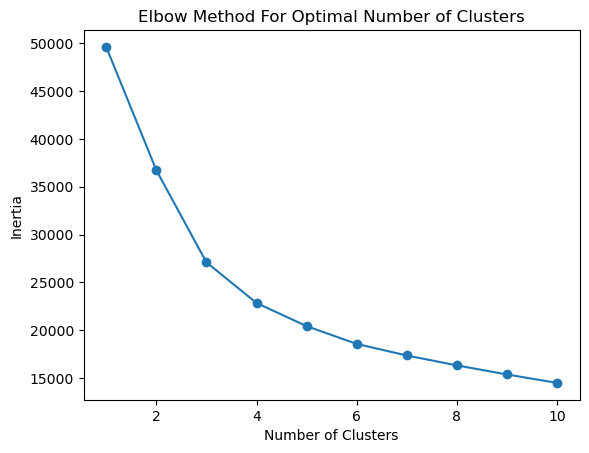

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ["Page Views", "Session Duration", "Bounce Rate", "Time on Page", "Previous Visits", "Conversion Rate"]

# Determine the optimal number of clusters using the Elbow method
web_columns = websiteFile[features]
clustercol = []

# Calculate inertia for a range of cluster numbers
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit_predict(web_columns)
    clustercol.append(km.inertia_)

fig, ax = plt.subplots()
ax.plot(range(1, 11), clustercol, '-o')
plt.title('Elbow Method For Optimal Number of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show()

C:\Users\kathl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


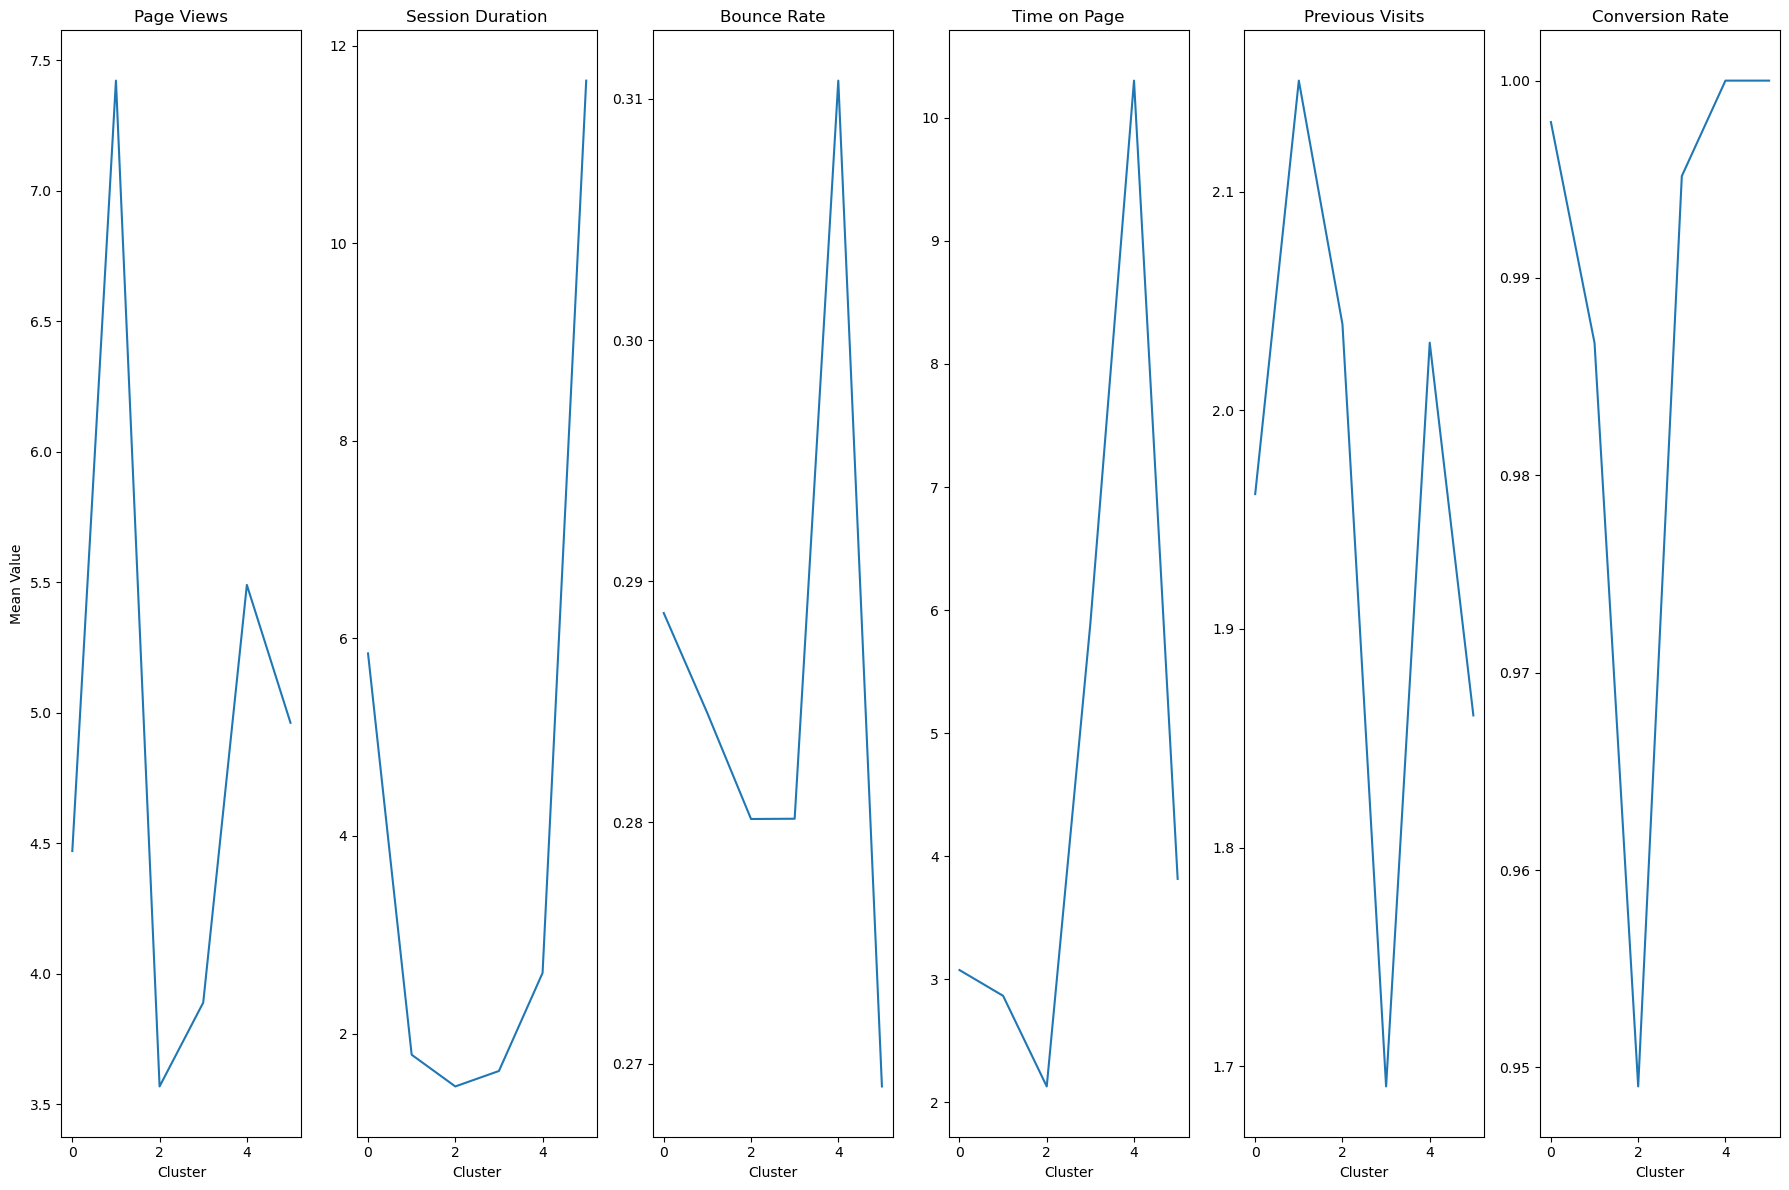

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k = 6 # Number of clusters
km = KMeans(n_clusters=k, random_state=42)
websiteFile['cluster'] = km.fit_predict(websiteFile[features])

# Cluster Analysis: Calculate the mean of each feature within each cluster
cluster_means = websiteFile.groupby('cluster')[features].mean()

# Cluster Visualization 
fig, axes = plt.subplots(1, len(features), figsize=(18, 12))

for i, feature in enumerate(features):
    axes[i].plot(cluster_means.index, cluster_means[feature])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Mean Value') if i == 0 else None  # Only add ylabel to the first plot

plt.tight_layout()
plt.show()


In [9]:
cluster_means

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
cluster,,,,,,
0,4.469649,5.847853,0.288681,3.074679,1.961661,0.997902
1,7.422505,1.784999,0.284527,2.865173,2.150743,0.986705
2,3.567416,1.464226,0.280141,2.128805,2.039326,0.949036
3,3.888579,1.620499,0.280152,5.892101,1.690808,0.995164
4,5.489691,2.613285,0.310754,10.302934,2.030928,1.000000
5,4.961240,11.646077,0.269053,3.815441,1.860465,1.000000


In [13]:
#Findings:

# 1. Page Views
# Cluster 1 has the highest average Page Views, which is 7.42, indicating users in this cluster are highly engaged, likely exploring multiple pages.
# Cluster 2 has the lowest average Page Views, which is 3.57, suggesting lower engagement or a more focused user journey.

# 2. Session Duration
# Cluster 5 stands out with the highest Session Duration, which is 11.65, which might indicate users spending considerable time on the site, possibly interacting with content in depth.
# Cluster 2 has the shortest Session Duration, which is 1.46, which could suggest quick visits or users finding what they need quickly.

# 3. Bounce Rate
# Cluster 4 has the highest Bounce Rate, which is 0.31, which might indicate that users in this cluster are not finding what they expect, leading to early exits.
# Cluster 5 has the lowest Bounce Rate, which is 0.269, suggesting more meaningful engagement and lower likelihood of users leaving after viewing just one page.

# 4. Time on Page
# Cluster 4 shows a significant amount of time spent on pages, which is 10.3, which, coupled with the high Session Duration, suggests users are deeply engaged with specific content.
# Cluster 2 has the lowest Time on Page, which is 2.13, indicating quicker visits, possibly due to more straightforward or less engaging content.

# 5. Previous Visits
# Cluster 1 has the highest number of Previous Visits, which is 2.15, indicating returning users who are potentially loyal or recurring visitors.
# Cluster 3 has the lowest, which is 1.69, suggesting newer visitors or those less likely to return.

# 6. Conversion Rate
# Clusters 4 and 5 both have a perfect Conversion Rate, which is 1.00, meaning every user in these clusters completed the desired action, indicating highly effective user experience for these groups.
# Cluster 2 has the lowest Conversion Rate, which is 0.95, which, although lower, still indicates a relatively high conversion success.

# Key Insights:
# Cluster 1: High Page Views and Previous Visits indicate this group might consist of loyal users who are highly engaged but have a moderate Bounce Rate. The Conversion Rate is slightly lower than the top-performing clusters, suggesting potential areas to improve user flow or conversion optimization.

# Cluster 4: High Time on Page and Bounce Rate might indicate users are spending a lot of time on a specific page but may not find what they need, leading to high bounce. However, the perfect Conversion Rate suggests that those who do not bounce are likely to convert, possibly after a more in-depth exploration.

# Cluster 5: This group combines high Session Duration, low Bounce Rate, and perfect Conversion Rate, making it the most effective cluster in terms of overall engagement and conversion. Understanding what drives this behavior could be key to improving other clusters.

# Cluster 2: Lower Page Views, Session Duration, and Conversion Rate suggest this cluster is less engaged, possibly due to less effective content or user experience. Strategies to increase engagement and conversion for this group should be explored.

In [ ]:
# 